## Python statistics essential training - 05_07_challenge

Standard imports

In [7]:
import math

In [8]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib
import matplotlib.pyplot as pp

In [10]:
%matplotlib inline

In [11]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [12]:
gapminder = pd.read_csv('gapminder.csv')

In [13]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [14]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Our cross-validation function

In [15]:
# we'll make a function that is generic in terms of formula and response variable
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training = shuffled.iloc[:len(data)//2]
        testing = shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula,data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
    
        ret.append(mse)
    
    return np.mean(ret)

The best model formula we've found

In [16]:
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'

In [ ]:
# In an economic model, an exogenous variable is one whose measure is determined outside the model and 
# is imposed on the model, and an exogenous change is a change in an exogenous variable.
# In contrast, an endogenous variable is a variable whose measure is determined by the model. 
# An endogenous change is a change in an endogenous variable in response to an exogenous change that is 
# imposed upon the model.
# In the LM model of interest rate determination,[1]: pp. 261–7  the supply of and demand for money determine
# the interest rate contingent on the level of the money supply, so the money supply is an exogenous variable 
# and the interest rate is an endogenous variable.
# class statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, 
# **kwargs)[source]
# I could use a financial stats dog's help today :)

1.0538857679936695

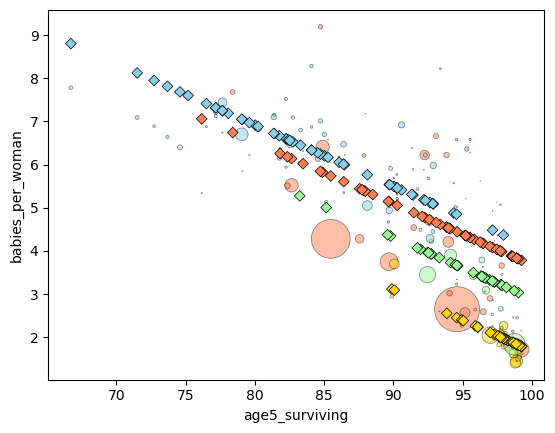

In [27]:
# Ordinary Least Squares
# OLS(endog[, exog, missing, hasconst])

fit = smf.ols(f_surviving,gdata).fit()
plotfit(fit,gdata)
cross_validate(gdata,f_surviving,'babies_per_woman')

1.0824745815665775

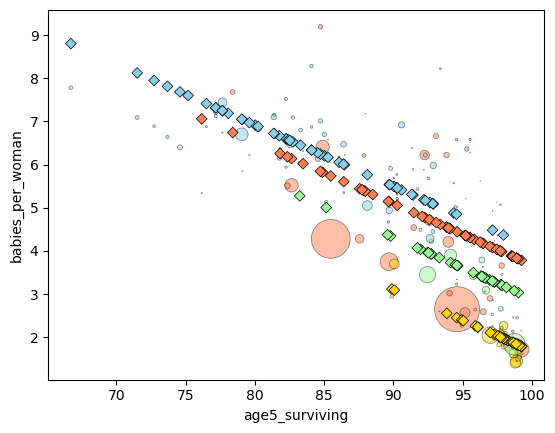

In [32]:
# Trying Weighted Least Squares
# class statsmodels.regression.linear_model.WLS(endog, exog, weights=1.0, missing='none', 
# hasconst=None, **kwargs)
# weightsarray_like, optional: A 1d array of weights. If you supply 1/W then the variables 
# are pre-multiplied by 1/sqrt(W). 
# If no weights are supplied the default value is 1 and WLS results are the same as OLS.

fit_a = smf.wls(f_surviving, gdata, weights=1.0).fit()
plotfit(fit,gdata)
cross_validate(gdata,f_surviving,'babies_per_woman')

In [33]:
# Requirement.  Find a model that fits the babies_per_woman data better (minimized residuals) 
# than our previous models thus better than "region plus survival at age 5"
# Hint: think about adding not just explanatory variables but functions of them, perhaps adding
# a new column to the data

In [19]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [24]:
# From 03_01
gapminder.loc[0:400:100]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
200,Algeria,1973,Africa,15804428.0,53.91,77.660,7.55,7581.0,20.755647
300,Angola,1992,Africa,11848971.0,49.60,77.400,7.12,3656.0,10.009582
400,Antigua and Barbuda,2011,America,88152.0,75.90,99.050,2.12,19988.0,54.724162
